# Image preprocessing

In [1]:
import imageio
import glob
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.utils.data as data
from torchvision import transforms, utils
import torch.nn as nn
import torch.optim as optim
import time
import cv2
import re 

import sys
import torchvision.transforms.functional as TF
from model import UNet

%matplotlib inline

In [4]:
def getint(name):
    return int(''.join(c for c in name if c.isdigit()))

images = sorted(glob.glob("real_ds_test/*.png"), key=getint)

In [5]:
images

['real_ds_test/image_0.png',
 'real_ds_test/image_1.png',
 'real_ds_test/image_2.png',
 'real_ds_test/image_3.png',
 'real_ds_test/image_4.png',
 'real_ds_test/image_5.png',
 'real_ds_test/image_6.png',
 'real_ds_test/image_7.png',
 'real_ds_test/image_8.png',
 'real_ds_test/image_9.png',
 'real_ds_test/image_10.png']

## Prepare input raw image

Before crop (2048, 2448, 3)
After crop (1024, 2048, 3)
After resize (512, 1024, 3)
After padding (1024, 1024, 3)


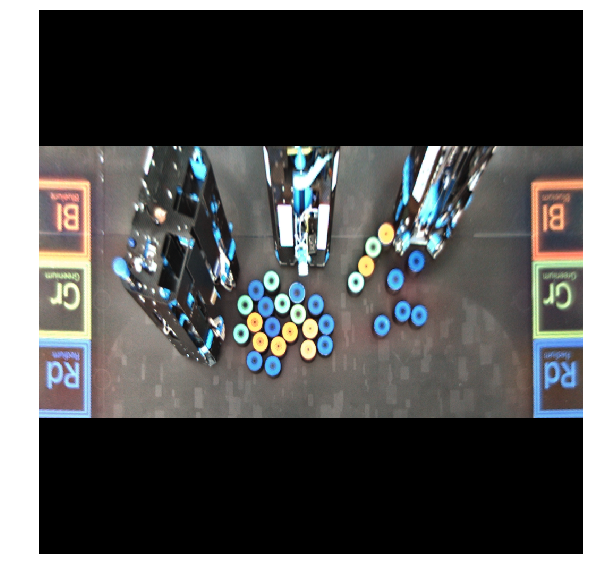

In [6]:
plt.figure(figsize=(10,10))

img = cv2.imread(images[np.random.randint(len(images))], cv2.IMREAD_COLOR)
print("Before crop", img.shape)
cropped_img = img[724:1748, 200:2248]
print("After crop", cropped_img.shape)
background = cropped_img
background = cv2.resize(cropped_img, (1024,512), interpolation = cv2.INTER_LANCZOS4)
print("After resize", background.shape)
background = np.pad(background, ((256, 256), (0,0), (0,0)), mode="constant", constant_values=0)
print("After padding", background.shape)
#hsvImg = cv2.cvtColor(background, cv2.COLOR_BGR2HSV)
#hsvImg[:,:,1] = cv2.multiply(hsvImg[:,:,1], 2)
#background = cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)
plt.imshow(background)
plt.axis("off")
plt.show()
#background.save("test.png")

In [8]:
for i, image in enumerate(images):
    print(image)
    img = cv2.imread(image, cv2.IMREAD_COLOR)
    cropped_img = img[724:1748, 200:2248]
    background = cropped_img
    background = cv2.resize(cropped_img, (1024,512), interpolation = cv2.INTER_LANCZOS4)
    background = np.pad(background, ((256, 256), (0,0), (0,0)), mode="constant", constant_values=0)
    #hsvImg = cv2.cvtColor(background, cv2.COLOR_BGR2HSV)
    #hsvImg[:,:,1] = cv2.multiply(hsvImg[:,:,1], 2)
    #background = cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)
    cv2.imwrite("dataset1024/test/img/" + str(i) + ".png", background)

real_ds_test/image_0.png
real_ds_test/image_1.png
real_ds_test/image_2.png
real_ds_test/image_3.png
real_ds_test/image_4.png
real_ds_test/image_5.png
real_ds_test/image_6.png
real_ds_test/image_7.png
real_ds_test/image_8.png
real_ds_test/image_9.png
real_ds_test/image_10.png


## Generate masks

In [16]:
images = sorted(glob.glob("dataset1024/val/img/*.png"), key=getint)
net = UNet(weights='./weights/fedge_detector_nuc_resize.pth.tar')

In [44]:
for i, image in enumerate(images):    
    print(image)
    img = cv2.imread(images[i], cv2.IMREAD_COLOR)
    image = TF.to_tensor(imageio.imread(images[i])).float().unsqueeze_(0)
    mask = 255 * (net.eval_predict(image) > 0.5).astype(np.uint8)
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.erode(mask,kernel,iterations = 1)
    imageio.imwrite("./dataset1024/val/mask/" + str(i) + ".png", mask)

dataset1024/val/img/0.png
dataset1024/val/img/1.png
dataset1024/val/img/2.png
dataset1024/val/img/3.png
dataset1024/val/img/4.png
dataset1024/val/img/5.png
dataset1024/val/img/6.png
dataset1024/val/img/7.png
dataset1024/val/img/8.png
dataset1024/val/img/9.png
dataset1024/val/img/10.png
dataset1024/val/img/11.png
dataset1024/val/img/12.png
dataset1024/val/img/13.png
dataset1024/val/img/14.png
dataset1024/val/img/15.png
dataset1024/val/img/16.png
dataset1024/val/img/17.png
dataset1024/val/img/18.png
dataset1024/val/img/19.png


## Shrink margins

In [190]:
images_mask = sorted(glob.glob("dataset1024/train/mask/*.png"), key=getint)
images_img = sorted(glob.glob("dataset1024/train/img/*.png"), key=getint)
np.random.seed(100)

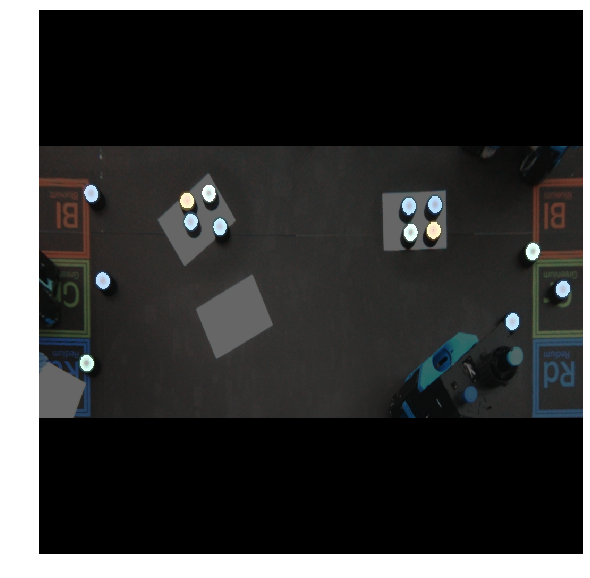

In [218]:
plt.figure(figsize=(10,10))
number = np.random.randint(len(images))

mask = cv2.imread(images_mask[number], cv2.IMREAD_GRAYSCALE)
img = cv2.imread(images_img[number], cv2.IMREAD_COLOR)

kernel = np.ones((5,5),np.uint8)
mask = cv2.erode(mask,kernel,iterations = 3)
mask = np.array(cv2.blur(mask,(5,5)) > 0, dtype=np.uint8)

plt.imshow(img)
plt.imshow(mask, cmap='gray', alpha=0.6)
plt.axis("off")
plt.show()

In [221]:
for i, image in enumerate(images_mask):
    print(image)
    mask = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.erode(mask, kernel, iterations = 3)
    mask = np.array(cv2.blur(mask, (5,5)) > 0, dtype=np.uint8) * 255
    cv2.imwrite("dataset1024/train/new_mask/" + str(i) + ".png", mask)

dataset1024/train/mask/0.png
dataset1024/train/mask/1.png
dataset1024/train/mask/2.png
dataset1024/train/mask/3.png
dataset1024/train/mask/4.png
dataset1024/train/mask/5.png
dataset1024/train/mask/6.png
dataset1024/train/mask/7.png
dataset1024/train/mask/8.png
dataset1024/train/mask/9.png
dataset1024/train/mask/10.png
dataset1024/train/mask/11.png
dataset1024/train/mask/12.png
dataset1024/train/mask/13.png
dataset1024/train/mask/14.png
dataset1024/train/mask/15.png
dataset1024/train/mask/16.png
dataset1024/train/mask/17.png
dataset1024/train/mask/18.png
dataset1024/train/mask/19.png
dataset1024/train/mask/20.png
dataset1024/train/mask/21.png
dataset1024/train/mask/22.png
dataset1024/train/mask/23.png
dataset1024/train/mask/24.png
dataset1024/train/mask/25.png
dataset1024/train/mask/26.png
dataset1024/train/mask/27.png
dataset1024/train/mask/28.png
dataset1024/train/mask/29.png
dataset1024/train/mask/30.png
dataset1024/train/mask/31.png
dataset1024/train/mask/32.png
dataset1024/train/ma